# Heart Attack Analysis and Prediction

### By Jonah Trani, Hans, Andy

In [1]:
import pandas as pd
#from clean_data import *
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import re
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import numpy as np
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("heart.csv",
                  #index_col=14,
                  low_memory=False)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


Text(0.5, 1.0, 'Nullity of Heart Risk Correlation between Columns')

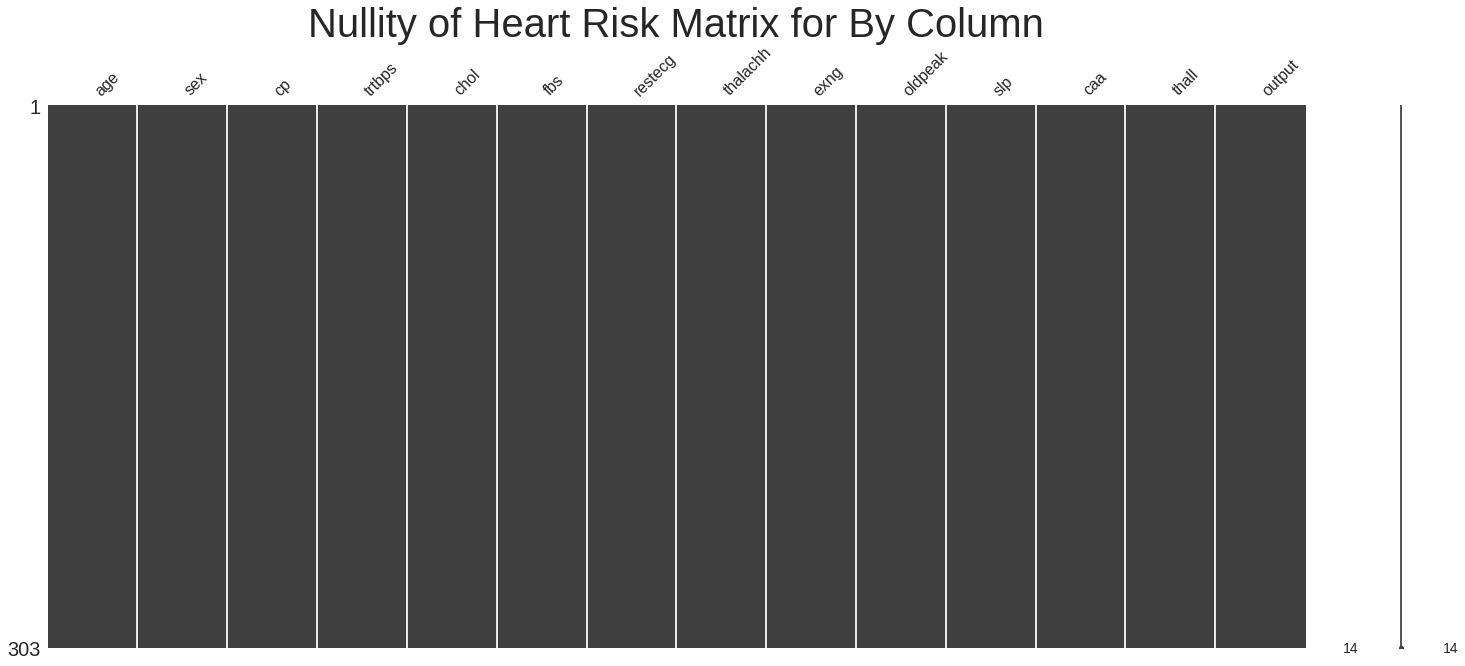

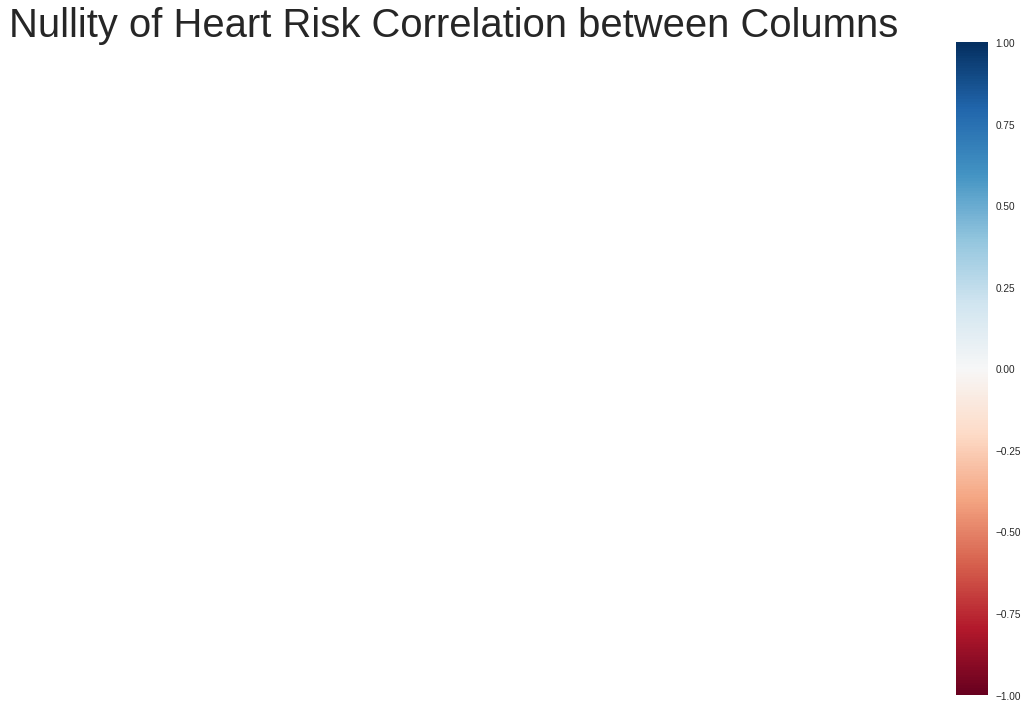

In [3]:
g = msno.matrix(df)
g.axes.set_title("Nullity of Heart Risk Matrix for By Column",fontsize=40)
g = msno.heatmap(df)
g.axes.set_title("Nullity of Heart Risk Correlation between Columns",fontsize=40)

In [4]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,#Missing Values


Text(0.5, 1.0, 'Count of Missing Values for Each Column')

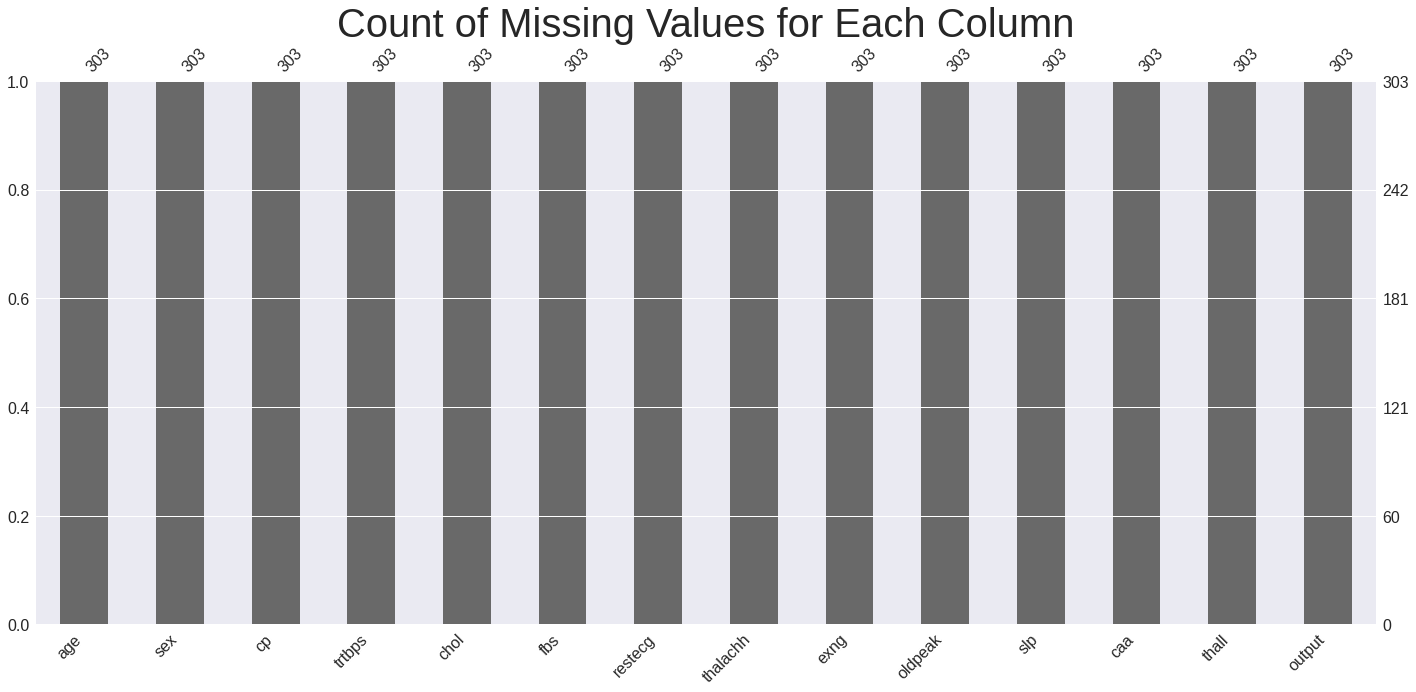

In [5]:
g = msno.bar(df);
g.set_title("Count of Missing Values for Each Column",fontsize=40)

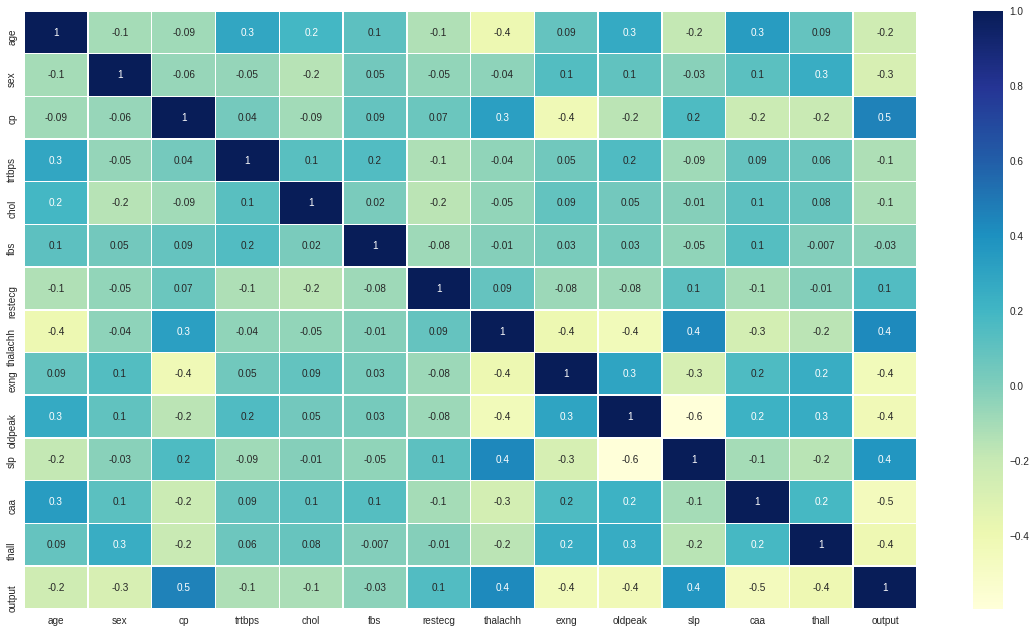

In [6]:
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr("spearman"), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

In [7]:
g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'sex'),
 Text(0, 2.5, 'cp'),
 Text(0, 3.5, 'trtbps'),
 Text(0, 4.5, 'chol'),
 Text(0, 5.5, 'fbs'),
 Text(0, 6.5, 'restecg'),
 Text(0, 7.5, 'thalachh'),
 Text(0, 8.5, 'exng'),
 Text(0, 9.5, 'oldpeak'),
 Text(0, 10.5, 'slp'),
 Text(0, 11.5, 'caa'),
 Text(0, 12.5, 'thall'),
 Text(0, 13.5, 'output')]